### Load the Datasets

In [1]:
#Load the necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [94]:
#Company Dataset
companies = pd.read_csv('companies.csv', encoding= 'unicode_escape')
companies['permalink']=companies['permalink'].str.lower()
companies

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
...,...,...,...,...,...,...,...,...,...,...
66363,/organization/zznode-science-and-technology-co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,operating,CHN,22,Beijing,Beijing,NaN
66364,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
66365,/organization/ãeron,ÃERON,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011
66366,/organization/ãasys-2,Ãasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014


In [95]:
#Rounds dataset
rounds2= pd.read_csv('rounds2.csv', encoding= 'unicode_escape')

In [96]:
rounds2['company_permalink']=rounds2['company_permalink'].str.lower()
rounds2

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.00
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.00
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.00
...,...,...,...,...,...,...
114944,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.00
114945,/organization/zzzzapp-com,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.00
114946,/organization/ãeron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,nan
114947,/organization/ãasys-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.00


## Table 1.1 Understanding the dataset


In [97]:
##Unique companies in round2
len(rounds2['company_permalink'].unique().tolist())

66370

In [98]:
##Unique companies in company dataframe
len(companies['permalink'].unique().tolist())

66368

In [7]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
permalink        66368 non-null object
name             66367 non-null object
homepage_url     61310 non-null object
category_list    63220 non-null object
status           66368 non-null object
country_code     59410 non-null object
state_code       57821 non-null object
region           58338 non-null object
city             58340 non-null object
founded_at       51147 non-null object
dtypes: object(10)
memory usage: 5.1+ MB


In [163]:
## Companies present in round 2 but not in companies dataset
rounds2[~(rounds2['company_permalink'].isin(companies['permalink']))]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
29597,/organization/e-cãbica,/funding-round/8491f74869e4fe8ba9c378394f8fbdea,seed,NaN,01-02-2015,nan
31863,/organization/energystone-games-çµç³æ¸¸æ,/funding-round/b89553f3d2279c5683ae93f45a21cfe0,seed,NaN,09-08-2014,nan
45176,/organization/huizuche-com-æ ç§ÿè½¦,/funding-round/8f8a32dbeeb0f831a78702f83af78a36,seed,NaN,18-09-2014,nan
58473,/organization/magnet-tech-ç£ç³ç§æ,/funding-round/8fc91fbb32bc95e97f151dd0cb4166bf,seed,NaN,16-08-2014,1625585.00
101036,/organization/tipcat-interactive-æ²èÿä¿¡æ¯ç...,/funding-round/41005928a1439cb2d706a43cb661f60f,seed,NaN,06-09-2010,nan
109969,/organization/weiche-tech-åè½¦ç§æ,/funding-round/f74e457f838b81fa0b29649740f186d8,venture,A,06-09-2015,nan
113839,/organization/zengame-ç¦ æ¸¸ç§æ,/funding-round/6ba28fb4f3eadf5a9c6c81bc5dde6cdf,seed,NaN,17-07-2010,nan


In [100]:
## Merging companies and round dataframe
master_frame = pd.merge(rounds2, companies, left_on='company_permalink', right_on='permalink')

In [101]:
master_frame

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.00,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.00,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.00,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114937,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.00,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
114938,/organization/zzzzapp-com,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.00,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
114939,/organization/ãeron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,nan,/organization/ãeron,ÃERON,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011
114940,/organization/ãasys-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.00,/organization/ãasys-2,Ãasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014


In [11]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114942 entries, 0 to 114941
Data columns (total 16 columns):
company_permalink          114942 non-null object
funding_round_permalink    114942 non-null object
funding_round_type         114942 non-null object
funding_round_code         31139 non-null object
funded_at                  114942 non-null object
raised_amount_usd          94958 non-null float64
permalink                  114942 non-null object
name                       114941 non-null object
homepage_url               108810 non-null object
category_list              111535 non-null object
status                     114942 non-null object
country_code               106271 non-null object
state_code                 104003 non-null object
region                     104782 non-null object
city                       104785 non-null object
founded_at                 94422 non-null object
dtypes: float64(1), object(15)
memory usage: 14.9+ MB


## Table 2.1 Representative Values of Investments for Each of these Funding Types

In [162]:
#Representative funding amount of each round
round(master_frame.groupby('funding_round_type')['raised_amount_usd'].median()).reset_index().sort_values('raised_amount_usd',ascending=False)

,funding_round_type,raised_amount_usd
10,secondary_market,32600000.00
8,private_equity,20000000.00
6,post_ipo_debt,19950000.00
7,post_ipo_equity,12262852.00
13,venture,5000000.00
2,debt_financing,1100000.00
12,undisclosed,1018680.00
0,angel,400000.00
11,seed,275000.00
1,convertible_note,272000.00


In [103]:
#Creating Dataframe out of Venture funded companies
venture=master_frame[master_frame['funding_round_type']=='venture']
venture

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.00,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.00,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
5,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,nan,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114927,/organization/zyrra,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,NaN,18-10-2012,140500.00,/organization/zyrra,Zyrra,http://www.zyrra.com,E-Commerce,operating,USA,MA,Boston,Cambridge,NaN
114929,/organization/zystor,/funding-round/7ea37c0ff4132b084832039a9380d34e,venture,A,16-12-2004,8500000.00,/organization/zystor,Zystor,http://www.zystor.com,Biotechnology,acquired,USA,WI,Milwaukee,Milwaukee,NaN
114930,/organization/zytoprotec,/funding-round/0c43e717298296d2fb334fb236300f6e,venture,A,29-01-2013,2686600.00,/organization/zytoprotec,Zytoprotec,http://www.zytoprotec.com,Biotechnology,operating,AUT,3,Vienna,Gerasdorf Bei Wien,01-01-2007
114934,/organization/zznode-science-and-technology-co...,/funding-round/171693e1e07e0230defd8fddb6de4515,venture,A,01-04-2012,1587301.00,/organization/zznode-science-and-technology-co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,operating,CHN,22,Beijing,Beijing,NaN


## Table 3.1 - Analysing top English Speaking countries

In [104]:
## Top 9 countries based on most funds raised
pd.options.display.float_format = '{:.2f}'.format
top_venture_country=round(venture.groupby('country_code')['raised_amount_usd'].sum().reset_index().sort_values('raised_amount_usd',ascending=False).head(9))
top_venture_country.head(10)

,country_code,raised_amount_usd
100,USA,422510842796.00
16,CHN,39835418773.00
31,GBR,20245627416.00
41,IND,14391858718.00
13,CAN,9583332317.00
30,FRA,7259536732.00
44,ISR,6907514579.00
23,DEU,6346959822.00
47,JPN,3363676611.00


### Scrapping Wikipedia to get a list of English Speaking Countries


In [105]:
#Scraping the Wikipedia page to get country codes of the english speaking countries
import requests
import urllib.request
import time
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
from urllib.request import urlopen
url = 'https://en.wikipedia.org/wiki/List_of_territorial_entities_where_English_is_an_official_language'
html = urlopen(url) 
soup = BeautifulSoup(html, 'html.parser')

In [106]:
tables = soup.find_all('table')

In [107]:
Country = []
Code = []
Region =[]
for table in tables:
    rows = table.find_all('tr')
    
    for row in rows:
        cells = row.find_all('td')
        
        
        if len(cells) > 1:
            country = cells[0]
            Country.append(country.text.strip())
            
            code = cells[1]
            Code.append(code.text.strip())
            
            
            

In [108]:
d = {'Country':Country,'country_code':Code}

In [109]:
english_country = pd.DataFrame(d)

In [110]:
english_country.head(20)

,Country,country_code
0,Australia,AUS
1,New Zealand[1],NZL
2,United Kingdom,GBR
3,United States,USA
4,Antigua and Barbuda[2],ATG
5,Bahamas[2],BHS
6,Barbados[3],BRB
7,Belize[4],BLZ
8,Botswana[4],BWA
9,Burundi[5],BDI


In [114]:
## Filtering top 3 english speaking countries
top_english_countries=top_venture_country[top_venture_country['country_code'].isin(english_country['country_code'])].head(3)
top_english_countries

,country_code,raised_amount_usd
100,USA,422510842796.00
31,GBR,20245627416.00
41,IND,14391858718.00


In [116]:
#Filter data based on top 3 English Speaking country
top_venture_country=master_frame[(master_frame['country_code'].isin(['USA','GBR','IND'])) & (master_frame['funding_round_type']=='venture')]

## Table 5.1 Sector wise investment analysis


In [24]:
#Extract Primary sector 
top_venture_country['primary_sector']=top_venture_country['category_list'].str.split('|').str[0]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [25]:
top_venture_country.drop(['category_list'],axis = 1,inplace = True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [26]:
## Read the Mappings dataset
mappings = pd.read_csv('mapping.csv')
mappings

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
683,Wholesale,0,0,0,0,0,0,0,1,0
684,Wine And Spirits,0,0,0,1,0,0,0,0,0
685,Wireless,0,0,0,1,0,0,0,0,0
686,Women,0,0,0,0,0,0,0,1,0


In [27]:
#Merging mapping and master dataframe
joined_df = pd.merge(top_venture_country,mappings,left_on='primary_sector',right_on='category_list')
joined_df

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,status,...,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00,/organization/-fame,#fame,http://livfame.com,operating,...,Media,0,0,0,1,0,0,0,0,0
1,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.00,/organization/90min,90min,http://www.90min.com,operating,...,Media,0,0,0,1,0,0,0,0,0
2,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.00,/organization/90min,90min,http://www.90min.com,operating,...,Media,0,0,0,1,0,0,0,0,0
3,/organization/90min,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,NaN,26-03-2014,18000000.00,/organization/90min,90min,http://www.90min.com,operating,...,Media,0,0,0,1,0,0,0,0,0
4,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.00,/organization/all-def-digital,All Def Digital,http://alldefdigital.com,operating,...,Media,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38810,/organization/yapta,/funding-round/67e2a4f223ba195d75c516c02157e269,venture,NaN,29-12-2010,3500000.00,/organization/yapta,Yapta,http://www.yapta.com,operating,...,Tracking,0,0,0,0,0,0,0,1,0
38811,/organization/yapta,/funding-round/b1777df10578e852be3afbe3bc325435,venture,D,22-07-2013,4220000.00,/organization/yapta,Yapta,http://www.yapta.com,operating,...,Tracking,0,0,0,0,0,0,0,1,0
38812,/organization/yapta,/funding-round/ed75e1064eb8b50c01c2e0b691ca9f1e,venture,C,25-06-2009,2000000.00,/organization/yapta,Yapta,http://www.yapta.com,operating,...,Tracking,0,0,0,0,0,0,0,1,0
38813,/organization/yapta,/funding-round/fc066baf3121b060b574214612a6c946,venture,NaN,29-07-2015,1786563.00,/organization/yapta,Yapta,http://www.yapta.com,operating,...,Tracking,0,0,0,0,0,0,0,1,0


In [28]:
#Extracting Main Sectors
def label_category(row):
    if row['Cleantech / Semiconductors']== 1:
        return 'Cleantech / Semiconductors'
    if row['Entertainment']== 1:
        return 'Entertainment'
    if row['Health']== 1:
        return 'Health'
    if row['Manufacturing']== 1:
        return 'Manufacturing'
    if row['News, Search and Messaging']== 1:
        return 'News,Search and Messaging'
    if row['Others']== 1:
        return 'Others'
    if row['Social, Finance, Analytics, Advertising']== 1:
        return 'Social, Finance, Analytics, Advertising'  

In [29]:
joined_df['Main Sector']=joined_df.apply (lambda row: label_category(row), axis=1)

In [30]:
joined_df

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,status,...,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising",Main Sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00,/organization/-fame,#fame,http://livfame.com,operating,...,0,0,0,1,0,0,0,0,0,Entertainment
1,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.00,/organization/90min,90min,http://www.90min.com,operating,...,0,0,0,1,0,0,0,0,0,Entertainment
2,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.00,/organization/90min,90min,http://www.90min.com,operating,...,0,0,0,1,0,0,0,0,0,Entertainment
3,/organization/90min,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,NaN,26-03-2014,18000000.00,/organization/90min,90min,http://www.90min.com,operating,...,0,0,0,1,0,0,0,0,0,Entertainment
4,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.00,/organization/all-def-digital,All Def Digital,http://alldefdigital.com,operating,...,0,0,0,1,0,0,0,0,0,Entertainment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38810,/organization/yapta,/funding-round/67e2a4f223ba195d75c516c02157e269,venture,NaN,29-12-2010,3500000.00,/organization/yapta,Yapta,http://www.yapta.com,operating,...,0,0,0,0,0,0,0,1,0,Others
38811,/organization/yapta,/funding-round/b1777df10578e852be3afbe3bc325435,venture,D,22-07-2013,4220000.00,/organization/yapta,Yapta,http://www.yapta.com,operating,...,0,0,0,0,0,0,0,1,0,Others
38812,/organization/yapta,/funding-round/ed75e1064eb8b50c01c2e0b691ca9f1e,venture,C,25-06-2009,2000000.00,/organization/yapta,Yapta,http://www.yapta.com,operating,...,0,0,0,0,0,0,0,1,0,Others
38813,/organization/yapta,/funding-round/fc066baf3121b060b574214612a6c946,venture,NaN,29-07-2015,1786563.00,/organization/yapta,Yapta,http://www.yapta.com,operating,...,0,0,0,0,0,0,0,1,0,Others


### India Investment Analysis

In [31]:
## India Investment Analysis
invest_india = joined_df[joined_df.country_code == 'IND']

In [32]:
## Total Investments
invest_india['funding_round_permalink'].count()

898

In [33]:
## Total Investment Amount
invest_india['raised_amount_usd'].sum()

13668331235.0

In [34]:
## Top 3 sectors
invest_india.groupby('Main Sector')['Main Sector'].count().reset_index(name='count') \
                             .sort_values(['count'], ascending=False) \
                             .head(3)

,Main Sector,count
5,Others,329
4,"News,Search and Messaging",154
6,"Social, Finance, Analytics, Advertising",104


In [35]:
best_others=invest_india[invest_india['Main Sector']=='Others'].groupby('company_permalink')['raised_amount_usd'].sum().reset_index().sort_values('raised_amount_usd',ascending=False).head(1)

In [36]:
## Most funded company in others sector
best_others['company_permalink'].str.split('/').str[2]

69    flipkart
Name: company_permalink, dtype: object

In [37]:
best_news=invest_india[invest_india['Main Sector']=='News,Search and Messaging'].groupby('company_permalink')['raised_amount_usd'].sum().reset_index().sort_values('raised_amount_usd',ascending=False).head(1)

In [38]:
## Most funded company in News Search Sector
best_news['company_permalink'].str.split('/').str[2]

67    quikr-india
Name: company_permalink, dtype: object

### USA Investment Analysis

In [39]:
#Total Investments in US
invest_usa = joined_df[joined_df.country_code == 'USA']
invest_usa['funding_round_permalink'].count()

35759

In [40]:
## Sum of invested amount
invest_usa['raised_amount_usd'].sum()

394680394849.0

In [41]:
## Top 3 sectors
invest_usa.groupby('Main Sector')['Main Sector'].count().reset_index(name='count') \
                             .sort_values(['count'], ascending=False) \
                             .head(3)

,Main Sector,count
5,Others,8693
0,Cleantech / Semiconductors,8113
6,"Social, Finance, Analytics, Advertising",5553


In [42]:
best_others=invest_usa[invest_usa['Main Sector']=='Others'].groupby('company_permalink')['raised_amount_usd'].sum().reset_index().sort_values('raised_amount_usd',ascending=False).head(1)

In [43]:
## Most funded company in others sector
best_others['company_permalink'].str.split('/').str[2]

3916    social-finance
Name: company_permalink, dtype: object

In [44]:
best_cleantech=invest_usa[invest_usa['Main Sector']=='Cleantech / Semiconductors'].groupby('company_permalink')['raised_amount_usd'].sum().reset_index().sort_values('raised_amount_usd',ascending=False).head(1)

In [45]:
## Most funded company in Cleantech Sector
best_cleantech['company_permalink'].str.split('/').str[2]

1426    freescale
Name: company_permalink, dtype: object

### UK Investment Analysis

In [46]:
## Total Investments
invest_uk = joined_df[joined_df.country_code =='GBR']
invest_uk['funding_round_permalink'].count()

2158

In [47]:
## Sum of investments
invest_uk['raised_amount_usd'].sum()

19097204731.0

In [48]:
## Top 3 sectors
invest_uk.groupby('Main Sector')['Main Sector'].count().reset_index(name='count') \
                             .sort_values(['count'], ascending=False) \
                             .head(3)

,Main Sector,count
5,Others,571
0,Cleantech / Semiconductors,456
6,"Social, Finance, Analytics, Advertising",359


In [49]:
best_others=invest_uk[invest_uk['Main Sector']=='Others'].groupby('company_permalink')['raised_amount_usd'].sum().reset_index().sort_values('raised_amount_usd',ascending=False).head(1)

In [50]:
## Most funded company in others sector
best_others['company_permalink'].str.split('/').str[2]

251    oneweb
Name: company_permalink, dtype: object

In [51]:
best_cleantech=invest_uk[invest_uk['Main Sector']=='Cleantech / Semiconductors'].groupby('company_permalink')['raised_amount_usd'].sum().reset_index().sort_values('raised_amount_usd',ascending=False).head(1)

In [52]:
## Most funded company in Cleantech sector
best_cleantech['company_permalink'].str.split('/').str[2]

129    immunocore
Name: company_permalink, dtype: object

## Plots

In [53]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

#### Most Representative value of each investments 

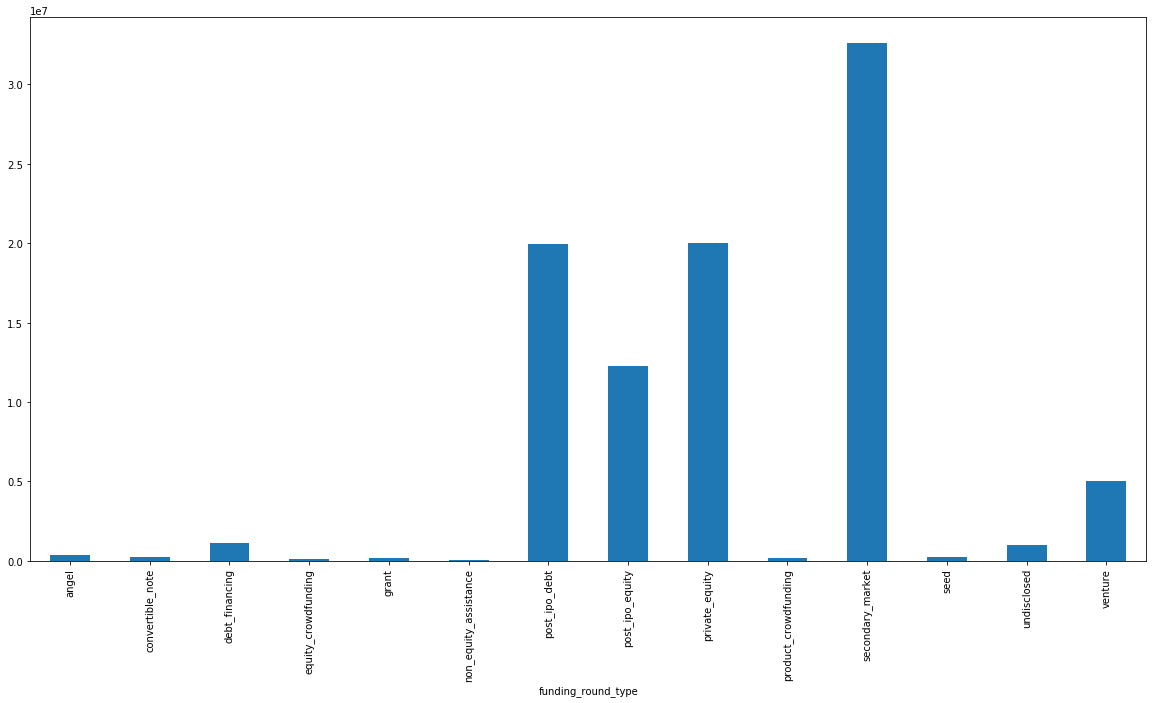

In [54]:
funds_value=round(master_frame.groupby('funding_round_type')['raised_amount_usd'].median())

funds_value.plot(kind='bar',figsize=(20,10))


#### Venture investments falls in range in which Spark Investments wants to invest per round

### Country wise Investment analysis

In [158]:
#top 9 venture funds investment in these countries
top_9_venture=venture.groupby('country_code')['raised_amount_usd'].sum().reset_index().sort_values('raised_amount_usd',ascending=False).head(9)
top_9_venture[['country_code','raised_amount_usd']]

,country_code,raised_amount_usd
100,USA,422510842796.00
16,CHN,39835418773.00
31,GBR,20245627416.00
41,IND,14391858718.00
13,CAN,9583332317.00
30,FRA,7259536732.00
44,ISR,6907514579.00
23,DEU,6346959822.00
47,JPN,3363676611.00


In [160]:
## List of English speaking countries scrapped from wikipedia page
english_country.head(10)

,Country,country_code
0,Australia,AUS
1,New Zealand[1],NZL
2,United Kingdom,GBR
3,United States,USA
4,Antigua and Barbuda[2],ATG
5,Bahamas[2],BHS
6,Barbados[3],BRB
7,Belize[4],BLZ
8,Botswana[4],BWA
9,Burundi[5],BDI


In [125]:
top_3_english=top_9_venture[top_9_venture['country_code'].isin(english_country['country_code'])]['country_code'].head(3)

In [126]:
## List of top 3 English speaking countries amongst the venture funds invested countries
top_3_english

100    USA
31     GBR
41     IND
Name: country_code, dtype: object

In [127]:
top_english = top_9_venture[top_9_venture["country_code"].isin(top_3_english)]
top_english

,country_code,raised_amount_usd
100,USA,422510842796.00
31,GBR,20245627416.00
41,IND,14391858718.00


In [128]:
## Non English speaking Countries
top_ventures = top_9_venture[~(top_9_venture["country_code"].isin(top_3_english))]
top_ventures

,country_code,raised_amount_usd
16,CHN,39835418773.00
13,CAN,9583332317.00
30,FRA,7259536732.00
44,ISR,6907514579.00
23,DEU,6346959822.00
47,JPN,3363676611.00


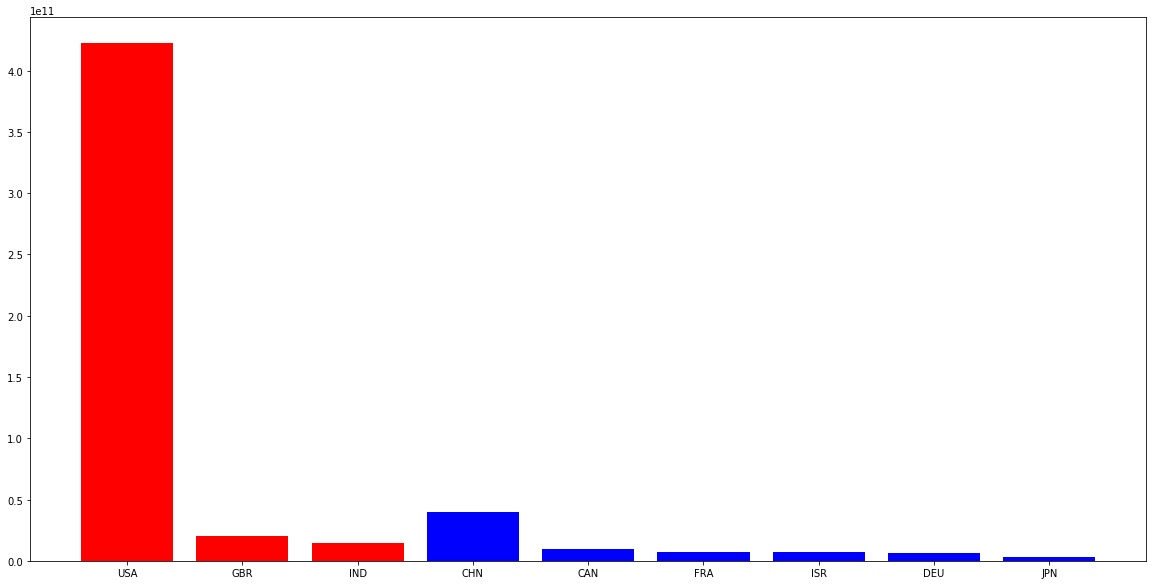

In [129]:
plt.figure(figsize=(20,10))
plt.bar(top_english["country_code"], top_english["raised_amount_usd"], color = 'red')
plt.bar(top_ventures["country_code"], top_ventures["raised_amount_usd"], color = 'blue')
plt.show()

##### Above Plot shows in red the top 3 English Speaking Countries where Spark funds can invest

### Find top 3 sectors and filter records on those 3 sectors for each country

In [136]:
us_top3 = invest_usa.groupby('Main Sector')['Main Sector'].count().reset_index(name='count') \
                             .sort_values(['count'], ascending=False) \
                             .head(3)
us_top3

,Main Sector,count
5,Others,8693
0,Cleantech / Semiconductors,8113
6,"Social, Finance, Analytics, Advertising",5553


In [144]:
## Filter USA records on those top 3 sectors
usa =invest_usa[invest_usa['Main Sector'].isin(us_top3['Main Sector'])]
usa

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,status,...,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising",Main Sector
112,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,nan,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,operating,...,0,0,0,0,0,0,0,1,0,Others
113,/organization/1010data,/funding-round/482fbf992b48f5c47d0080ab7ec0cb54,venture,NaN,08-03-2010,35000000.00,/organization/1010data,1010data,http://www.1010data.com,acquired,...,0,0,0,0,0,0,0,1,0,Others
114,/organization/16-mile-solutions,/funding-round/3a671cf6f08fe5d0a878f5627134384c,venture,NaN,11-06-2009,199957.00,/organization/16-mile-solutions,16 Mile Solutions,NaN,operating,...,0,0,0,0,0,0,0,1,0,Others
115,/organization/170-systems,/funding-round/b84bb882ca873f5fb96535671981196d,venture,A,16-04-2002,14000000.00,/organization/170-systems,170 Systems,http://www.170systems.com,acquired,...,0,0,0,0,0,0,0,1,0,Others
116,/organization/1energy-systems,/funding-round/0502de190cb6fd03ba9435767080bcdb,venture,NaN,22-04-2013,1450000.00,/organization/1energy-systems,1Energy Systems,http://1energysystems.com,operating,...,0,0,0,0,0,0,0,1,0,Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38810,/organization/yapta,/funding-round/67e2a4f223ba195d75c516c02157e269,venture,NaN,29-12-2010,3500000.00,/organization/yapta,Yapta,http://www.yapta.com,operating,...,0,0,0,0,0,0,0,1,0,Others
38811,/organization/yapta,/funding-round/b1777df10578e852be3afbe3bc325435,venture,D,22-07-2013,4220000.00,/organization/yapta,Yapta,http://www.yapta.com,operating,...,0,0,0,0,0,0,0,1,0,Others
38812,/organization/yapta,/funding-round/ed75e1064eb8b50c01c2e0b691ca9f1e,venture,C,25-06-2009,2000000.00,/organization/yapta,Yapta,http://www.yapta.com,operating,...,0,0,0,0,0,0,0,1,0,Others
38813,/organization/yapta,/funding-round/fc066baf3121b060b574214612a6c946,venture,NaN,29-07-2015,1786563.00,/organization/yapta,Yapta,http://www.yapta.com,operating,...,0,0,0,0,0,0,0,1,0,Others


In [133]:
uk_top3 = invest_uk.groupby('Main Sector')['Main Sector'].count().reset_index(name='count') \
                             .sort_values(['count'], ascending=False) \
                             .head(3)
uk_top3

,Main Sector,count
5,Others,571
0,Cleantech / Semiconductors,456
6,"Social, Finance, Analytics, Advertising",359


In [145]:
## Filter UK top 3 sectors
uk = invest_uk[invest_uk['Main Sector'].isin(us_top3['Main Sector'])]
uk

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,status,...,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising",Main Sector
155,/organization/aconite-technology,/funding-round/80f33a0763f30c2e21f0c8bf686daf2a,venture,NaN,17-01-2006,592000.00,/organization/aconite-technology,Aconite Technology,http://www.aconite.net,operating,...,0,0,0,0,0,0,0,1,0,Others
179,/organization/adaptis-solutions,/funding-round/3d32b09bfb6972efc8e37f1018eb3f38,venture,NaN,25-06-2012,777729.00,/organization/adaptis-solutions,Adaptis Solutions,http://www.adaptis-solutions.com,operating,...,0,0,0,0,0,0,0,1,0,Others
199,/organization/agillic,/funding-round/e2cf061deb626172efd501e2c01d3b31,venture,A,08-05-2007,nan,/organization/agillic,Agillic,NaN,operating,...,0,0,0,0,0,0,0,1,0,Others
220,/organization/alai,/funding-round/678f26d779d99702719b197cfa9521da,venture,NaN,07-03-2006,573000.00,/organization/alai,Alai,NaN,operating,...,0,0,0,0,0,0,0,1,0,Others
221,/organization/alaric-systems,/funding-round/0aa7404f7a6121a07a8722d6609c16cf,venture,NaN,01-01-2000,3716711.00,/organization/alaric-systems,Alaric Systems,http://alaric.com,acquired,...,0,0,0,0,0,0,0,1,0,Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38762,/organization/yoyo,/funding-round/b18a6d85f32d12ace2366c0b7f85facc,venture,A,15-04-2015,10000000.00,/organization/yoyo,Yoyo Wallet,http://www.yoyowallet.com,operating,...,0,0,0,0,0,0,0,1,0,Others
38781,/organization/stingray-geophysical,/funding-round/3303f9c6427e675f96ab85083c751a8d,venture,A,10-11-2006,1300000.00,/organization/stingray-geophysical,Stingray Geophysical,http://www.stingraygeo.com,operating,...,0,0,1,0,0,0,0,0,0,Cleantech / Semiconductors
38782,/organization/stingray-geophysical,/funding-round/64ec067f3ff21259e3d1463112c1db61,venture,NaN,27-05-2010,4570000.00,/organization/stingray-geophysical,Stingray Geophysical,http://www.stingraygeo.com,operating,...,0,0,1,0,0,0,0,0,0,Cleantech / Semiconductors
38783,/organization/stingray-geophysical,/funding-round/6fdf5c9dc4be9d883a18fdbbe00c6209,venture,NaN,23-03-2006,11460000.00,/organization/stingray-geophysical,Stingray Geophysical,http://www.stingraygeo.com,operating,...,0,0,1,0,0,0,0,0,0,Cleantech / Semiconductors


In [157]:
##Filter India top 3 sectors
ind_top3 =invest_india.groupby('Main Sector')['Main Sector'].count().reset_index(name='count') \
                             .sort_values(['count'], ascending=False) \
                             .head(3)
ind_top3
ind = invest_india[invest_india['Main Sector'].isin(ind_top3['Main Sector'])]

In [147]:
#Concate the three countries data
frames = [usa, uk, ind]

result = pd.concat(frames)

In [152]:
#Create pivot table out of concat data
df_pivot=pd.pivot_table(data=result,values='raised_amount_usd',index='country_code',columns='Main Sector',aggfunc=sum)
df_pivot

Main Sector,Cleantech / Semiconductors,"News,Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
country_code,,,,
GBR,5028729267.00,nan,4400423043.00,2851116278.00
IND,nan,1739579948.00,6318507440.00,866763870.00
USA,118764441980.00,nan,82084578045.00,62062992808.00


In [154]:
## Find proportionate values
df_pivot_perc=df_pivot[["Cleantech / Semiconductors","News,Search and Messaging","Others","Social, Finance, Analytics, Advertising"]].apply(lambda x:x/x.sum(),axis=1)

#### Stacked chart showing top 3 sectors investment for each country

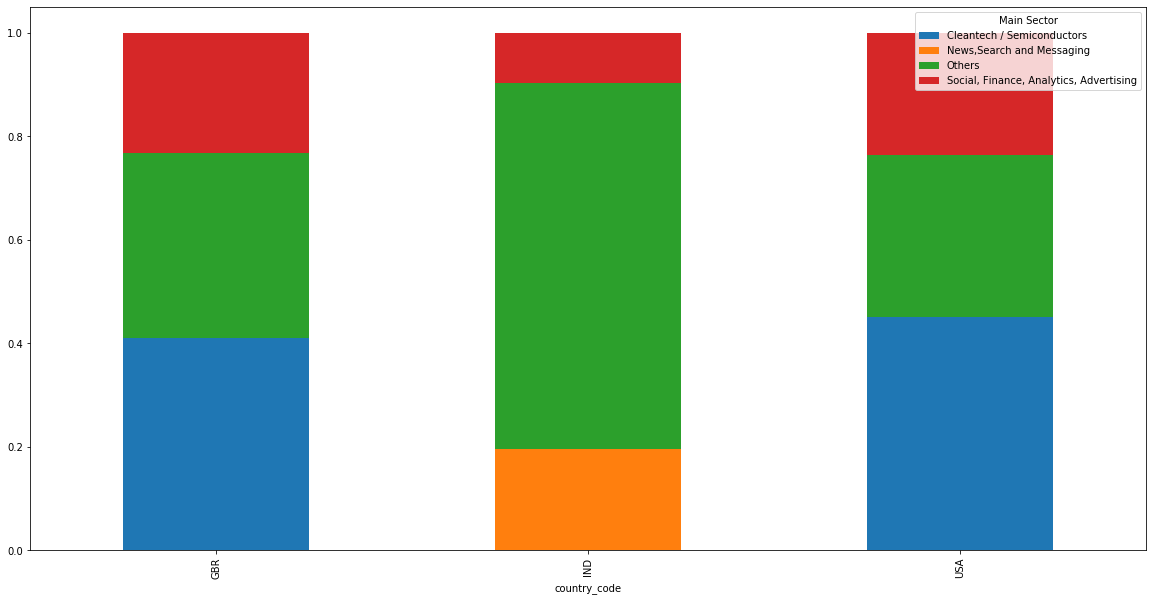

In [156]:
df_pivot_perc.plot(kind="bar",stacked="True",figsize=(20,10))
plt.show()